# Tự encoding data

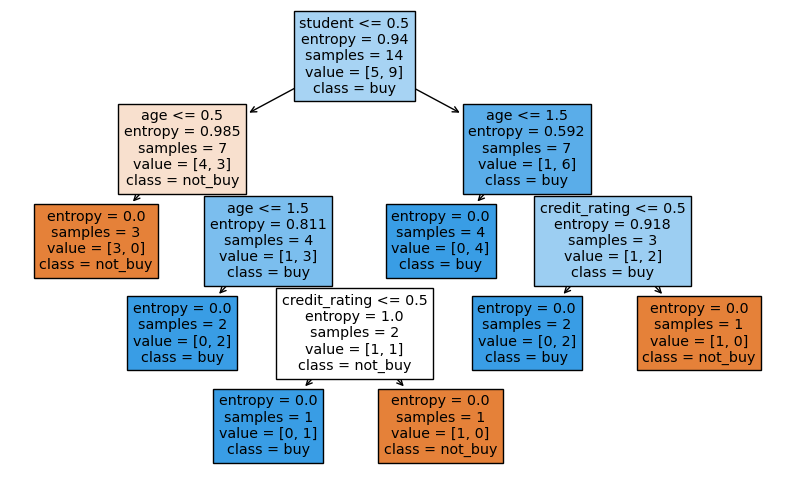

In [6]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Setup data
age = [0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2]
# 0 is <= 30, 1 is from 31 to 40, 2 is > 40
income = [2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1]
# 0 is low, 1 is medium, 2 is high
student = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
# 0 is no, 1 is yes
credit_rating = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
# 0 is fair, 1 is excellent
buys_computer = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

# Set X, y
X = np.array([age, income, student, credit_rating]).T
y = buys_computer

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 algorithm uses information gain (entropy) for splitting
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

# Sử dụng thư viện để encoding

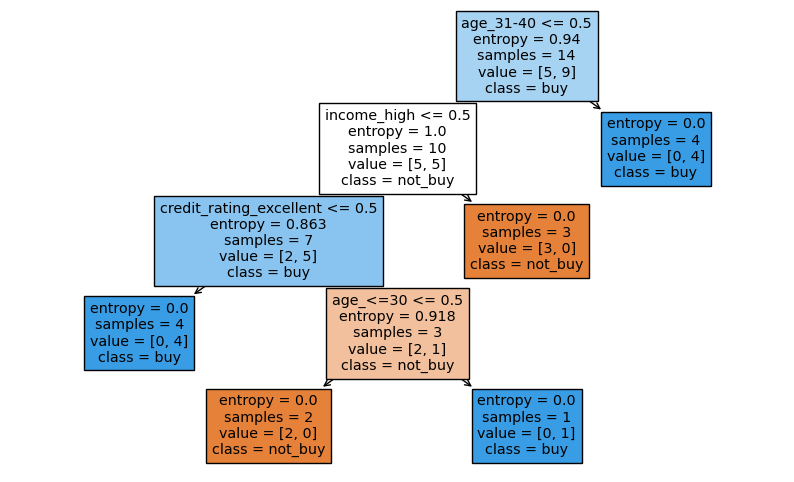

In [5]:
import pandas as pd

# Setup data
data = {
    "age": [
        "<=30",
        "<=30",
        "31-40",
        ">40",
        ">40",
        ">40",
        "31-40",
        "<=30",
        "<=30",
        ">40",
        "<=30",
        "31-40",
        "31-40",
        ">40",
    ],
    "income": [
        "high",
        "high",
        "high",
        "medium",
        "low",
        "low",
        "low",
        "high",
        "low",
        "medium",
        "medium",
        "medium",
        "high",
        "medium",
    ],
    "student": [
        "no",
        "no",
        "no",
        "no",
        "yes",
        "yes",
        "yes",
        "no",
        "yes",
        "yes",
        "yes",
        "no",
        "yes",
        "no",
    ],
    "credit_rating": [
        "fair",
        "excellent",
        "fair",
        "fair",
        "fair",
        "excellent",
        "excellent",
        "fair",
        "fair",
        "fair",
        "excellent",
        "excellent",
        "fair",
        "excellent",
    ],
    "buys_computer": [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# One-Hot Encoding
df_encoded = pd.get_dummies(df[["age", "income", "student", "credit_rating"]])

# Set X, y
X = df_encoded.values
y = df["buys_computer"].values

# Create and fit the decision tree model
clf = DecisionTreeClassifier(
    criterion="entropy"
)  # ID3 algorithm uses information gain (entropy) for splitting
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(
    clf, feature_names=df_encoded.columns, class_names=["not_buy", "buy"], filled=True
)
plt.show()

In [7]:
df_encoded

,age_31-40,age_<=30,age_>40,income_high,income_low,income_medium,student_no,student_yes,credit_rating_excellent,credit_rating_fair
0,False,True,False,True,False,False,True,False,False,True
1,False,True,False,True,False,False,True,False,True,False
2,True,False,False,True,False,False,True,False,False,True
3,False,False,True,False,False,True,True,False,False,True
4,False,False,True,False,True,False,False,True,False,True
5,False,False,True,False,True,False,False,True,True,False
6,True,False,False,False,True,False,False,True,True,False
7,False,True,False,True,False,False,True,False,False,True
8,False,True,False,False,True,False,False,True,False,True
9,False,False,True,False,False,True,False,True,False,True


# Làm đơn giản cây 

## Cách 1: Giới hạn chiều sâu của cây 

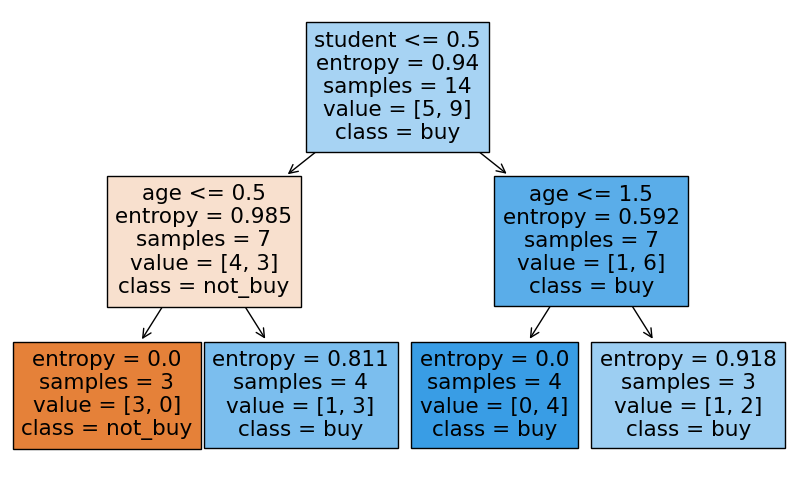

In [9]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Setup data
age = [0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2]
# 0 is <= 30, 1 is from 31 to 40, 2 is > 40
income = [2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1]
# 0 is low, 1 is medium, 2 is high
student = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
# 0 is no, 1 is yes
credit_rating = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
# 0 is fair, 1 is excellent
buys_computer = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

# Set X, y
X = np.array([age, income, student, credit_rating]).T
y = buys_computer

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)  # ID3 algorithm uses information gain (entropy) for splitting
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

Sai 2/14 = 14% trên train set

## Cách 2: Tỉa cây sau khi đã huấn luyện được 100% trên cây

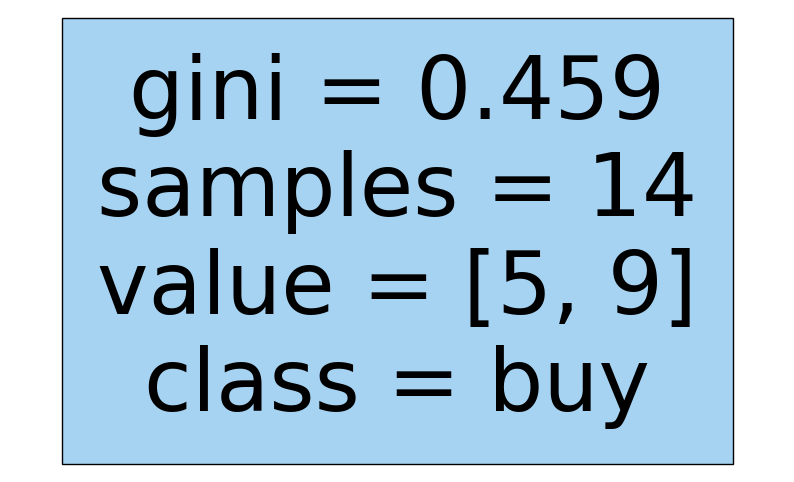

In [10]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Setup data
age = [0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2]
# 0 is <= 30, 1 is from 31 to 40, 2 is > 40
income = [2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1]
# 0 is low, 1 is medium, 2 is high
student = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
# 0 is no, 1 is yes
credit_rating = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
# 0 is fair, 1 is excellent
buys_computer = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

# Set X, y
X = np.array([age, income, student, credit_rating]).T
y = buys_computer

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 algorithm uses information gain (entropy) for splitting
clf.fit(X, y)

# Prune the decision tree
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alpha = max(ccp_alphas)
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

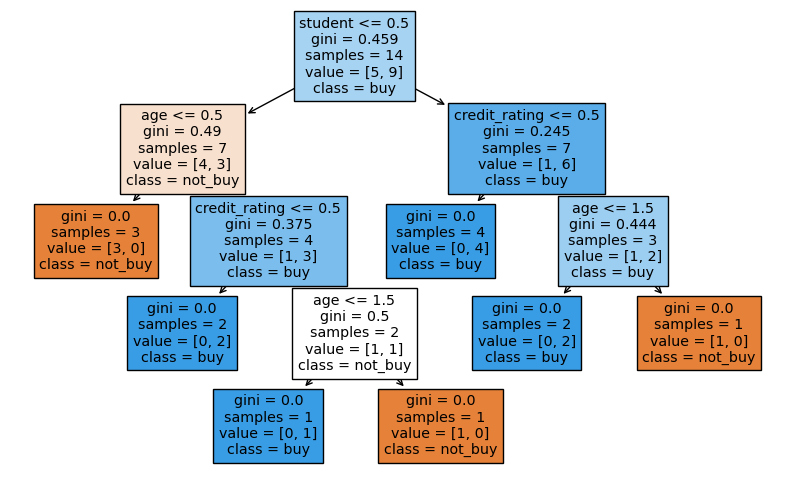

In [11]:
ccp_alpha = min(ccp_alphas)
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

In [12]:
ccp_alphas

array([0.        , 0.11589687, 0.14791819, 0.20632791])

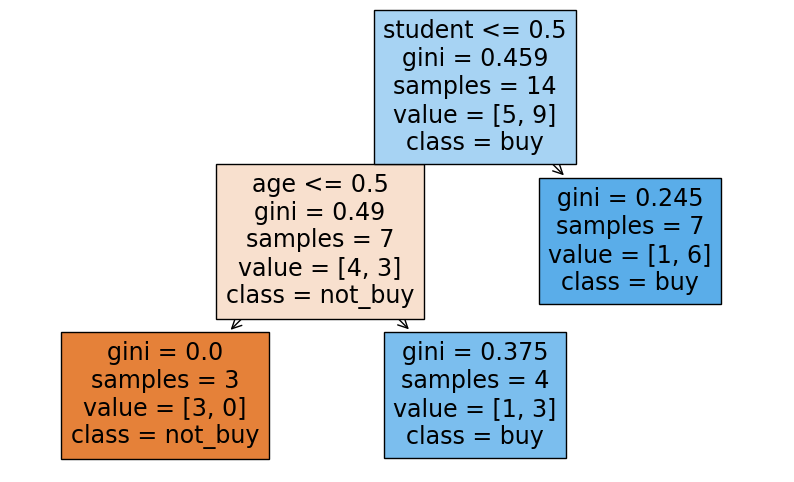

In [20]:
ccp_alpha = 0.07 # cpp_alpha >= 0.11589687 thì sẽ tỉa cho chỉ còn lại 1 node là node gốc (chọn hết là 1 cái, không dùng thuộc tính phân loại -> toàn bộ dữ liệu có nhãn khác sẽ bị sai)
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

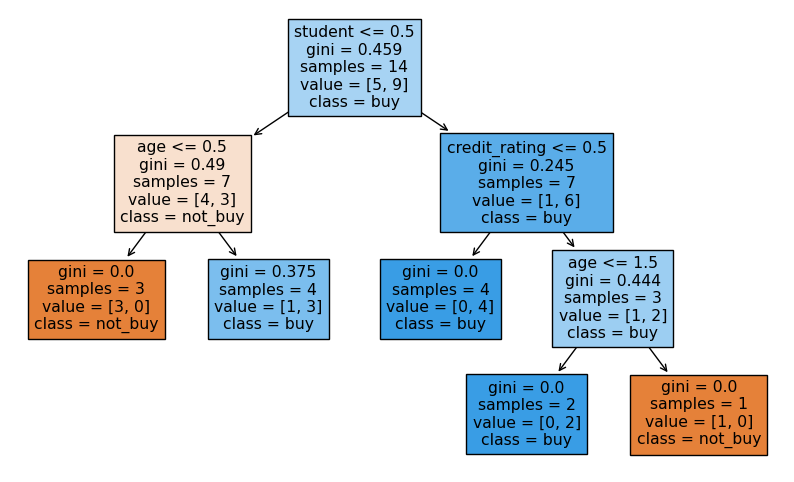

In [19]:
ccp_alpha = 0.06 # cpp_alpha >= 0.11589687 thì sẽ tỉa cho chỉ còn lại 1 node là node gốc (chọn hết là 1 cái, không dùng thuộc tính phân loại -> toàn bộ dữ liệu có nhãn khác sẽ bị sai)
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()